## ayvelasquezma Data Exploration

Research provides utility functions to query pricing, volume, and returns data for 8000+ US equities, from 2002 up to the most recently completed trading day. These functions take an asset (or list of assets) along with a start and end date, and return a pandas [Series](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.html) (or [DataFrame](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.html)) indexed by date.  

Let's define the period of time we want to explore and use the `returns` function to query data for EQIX:

In [1]:
# Research environment functions
from quantopian.research import returns, symbols

# Select a time range to inspect
period_start = '2017-01-01'
period_end = '2017-12-31'

# Query returns data for EQIX
# over the selected time range
eqix_returns = returns(
    assets=symbols('EQIX'),
    start=period_start,
    end=period_end,
)

# Display first 10 rows
eqix_returns.head(10)

2017-01-03 00:00:00+00:00    0.002935
2017-01-04 00:00:00+00:00    0.019828
2017-01-05 00:00:00+00:00    0.011102
2017-01-06 00:00:00+00:00    0.001945
2017-01-09 00:00:00+00:00    0.007262
2017-01-10 00:00:00+00:00   -0.008496
2017-01-11 00:00:00+00:00    0.004216
2017-01-12 00:00:00+00:00    0.006918
2017-01-13 00:00:00+00:00    0.002192
2017-01-17 00:00:00+00:00    0.003092
Freq: C, Name: Equity(24482 [EQIX]), dtype: float64

### Alternative Data

In addition to pricing and volume data, Quantopian integrates a number of alternative datasets that include corporate fundamentals, stock sentiment analysis, and macroeconomic indicators, to name a few. You can find the complete list of 50+ datasets on Quantopian's [data page](https://www.quantopian.com/data).  

Our goal in this tutorial will be to build an algorithm that selects and trades assets based on sentiment data, so let's take a look at PsychSignal's [StockTwits Trader Mood](https://www.quantopian.com/data/psychsignal/stocktwits) dataset. PsychSignal's dataset assigns bull and bear scores to stocks each day based on the aggregate sentiment from messages posted on Stocktwits, a financial communications platform.  

We can start by inspecting the message volume and sentiment score (bull minus bear) columns from the `stocktwits` dataset. We will query the data using Quantopian's Pipeline API, which is a powerful tool you will use over and over again to access and analyze data in Research. You will learn a lot more about the Pipeline API in the next lesson and a [later tutorial](https://www.quantopian.com/tutorials/pipeline). For now all you need to know is that the following code uses a data pipeline to query `stocktwits` and returns data, and plots the results for EQIX:

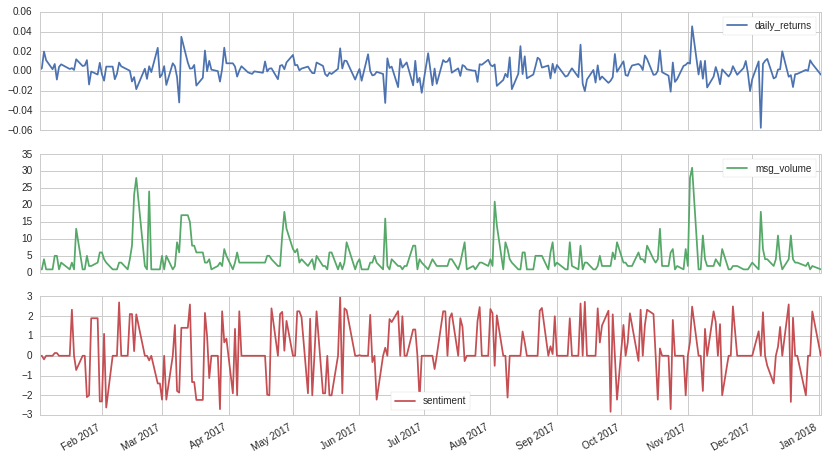

In [2]:
# Pipeline imports
from quantopian.research import run_pipeline
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import Returns
from quantopian.pipeline.data.psychsignal import stocktwits

# Pipeline definition
def make_pipeline():

    returns = Returns(window_length=2)
    sentiment = stocktwits.bull_minus_bear.latest
    msg_volume = stocktwits.total_scanned_messages.latest

    return Pipeline(
        columns={
            'daily_returns': returns,
            'sentiment': sentiment,
            'msg_volume': msg_volume,
        },
    )

# Pipeline execution
data_output = run_pipeline(
    make_pipeline(),
    start_date=period_start,
    end_date=period_end
)

# Filter results for EQIX
eqix_output = data_output.xs(
    symbols('EQIX'),
    level=1
)

# Plot results for EQIX
eqix_output.plot(subplots=True);

When exploring a dataset, try to look for patterns that might serve as the basis for a trading strategy. For example, the above plot shows some matching spikes between daily returns and `stocktwits` message volume, and in some cases the direction of the spikes in returns match the direction of EQIX's sentiment score. This looks interesting enough that we should conduct more rigorous statistical tests to confirm our hypotheses.  

In the next lesson we will cover the Pipeline API in more depth.